# Importing Library


In [1]:
#importing required LIBRARY
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math



#importing LIBRARIES for LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM
import plotly.graph_objects as go
import tensorflow as tf

%matplotlib inline


Creating Required Datset

In [2]:
#creating required dataset by appending data of past 10 years
df_nifty50 = pd.read_csv('nifty50_2011.csv')
LSTM_nifty50=df_nifty50['Close']
df_nifty50 = pd.read_csv('nifty50_2012.csv')
LSTM_closing=df_nifty50['Close']
LSTM_nifty50 = LSTM_nifty50.append(LSTM_closing, ignore_index = True)
df_nifty50 = pd.read_csv('nifty50_2013.csv')
LSTM_closing=df_nifty50['Close']
LSTM_nifty50 = LSTM_nifty50.append(LSTM_closing, ignore_index = True)
df_nifty50 = pd.read_csv('nifty50_2014.csv')
LSTM_closing=df_nifty50['Close']
LSTM_nifty50 = LSTM_nifty50.append(LSTM_closing, ignore_index = True)
df_nifty50 = pd.read_csv('nifty50_2015.csv')
LSTM_closing=df_nifty50['Close']
LSTM_nifty50 = LSTM_nifty50.append(LSTM_closing, ignore_index = True)
df_nifty50 = pd.read_csv('nifty50_2016.csv')
LSTM_closing=df_nifty50['Close']
LSTM_nifty50 = LSTM_nifty50.append(LSTM_closing, ignore_index = True)
df_nifty50 = pd.read_csv('nifty50_2017.csv')
LSTM_closing=df_nifty50['Close']
LSTM_nifty50 = LSTM_nifty50.append(LSTM_closing, ignore_index = True)
df_nifty50 = pd.read_csv('nifty50_2018.csv')
LSTM_closing=df_nifty50['Close']
LSTM_nifty50 = LSTM_nifty50.append(LSTM_closing, ignore_index = True)
df_nifty50 = pd.read_csv('nifty50_2019.csv')
LSTM_closing=df_nifty50['Close']
LSTM_nifty50 = LSTM_nifty50.append(LSTM_closing, ignore_index = True)
df_nifty50 = pd.read_csv('nifty50_2020.csv')
LSTM_closing=df_nifty50['Close']
LSTM_nifty50 = LSTM_nifty50.append(LSTM_closing, ignore_index = True)
df_nifty50 = pd.read_csv('nifty50_2021.csv')
LSTM_closing=df_nifty50['Close']
LSTM_nifty50 = LSTM_nifty50.append(LSTM_closing, ignore_index = True)




Showing plot for given data

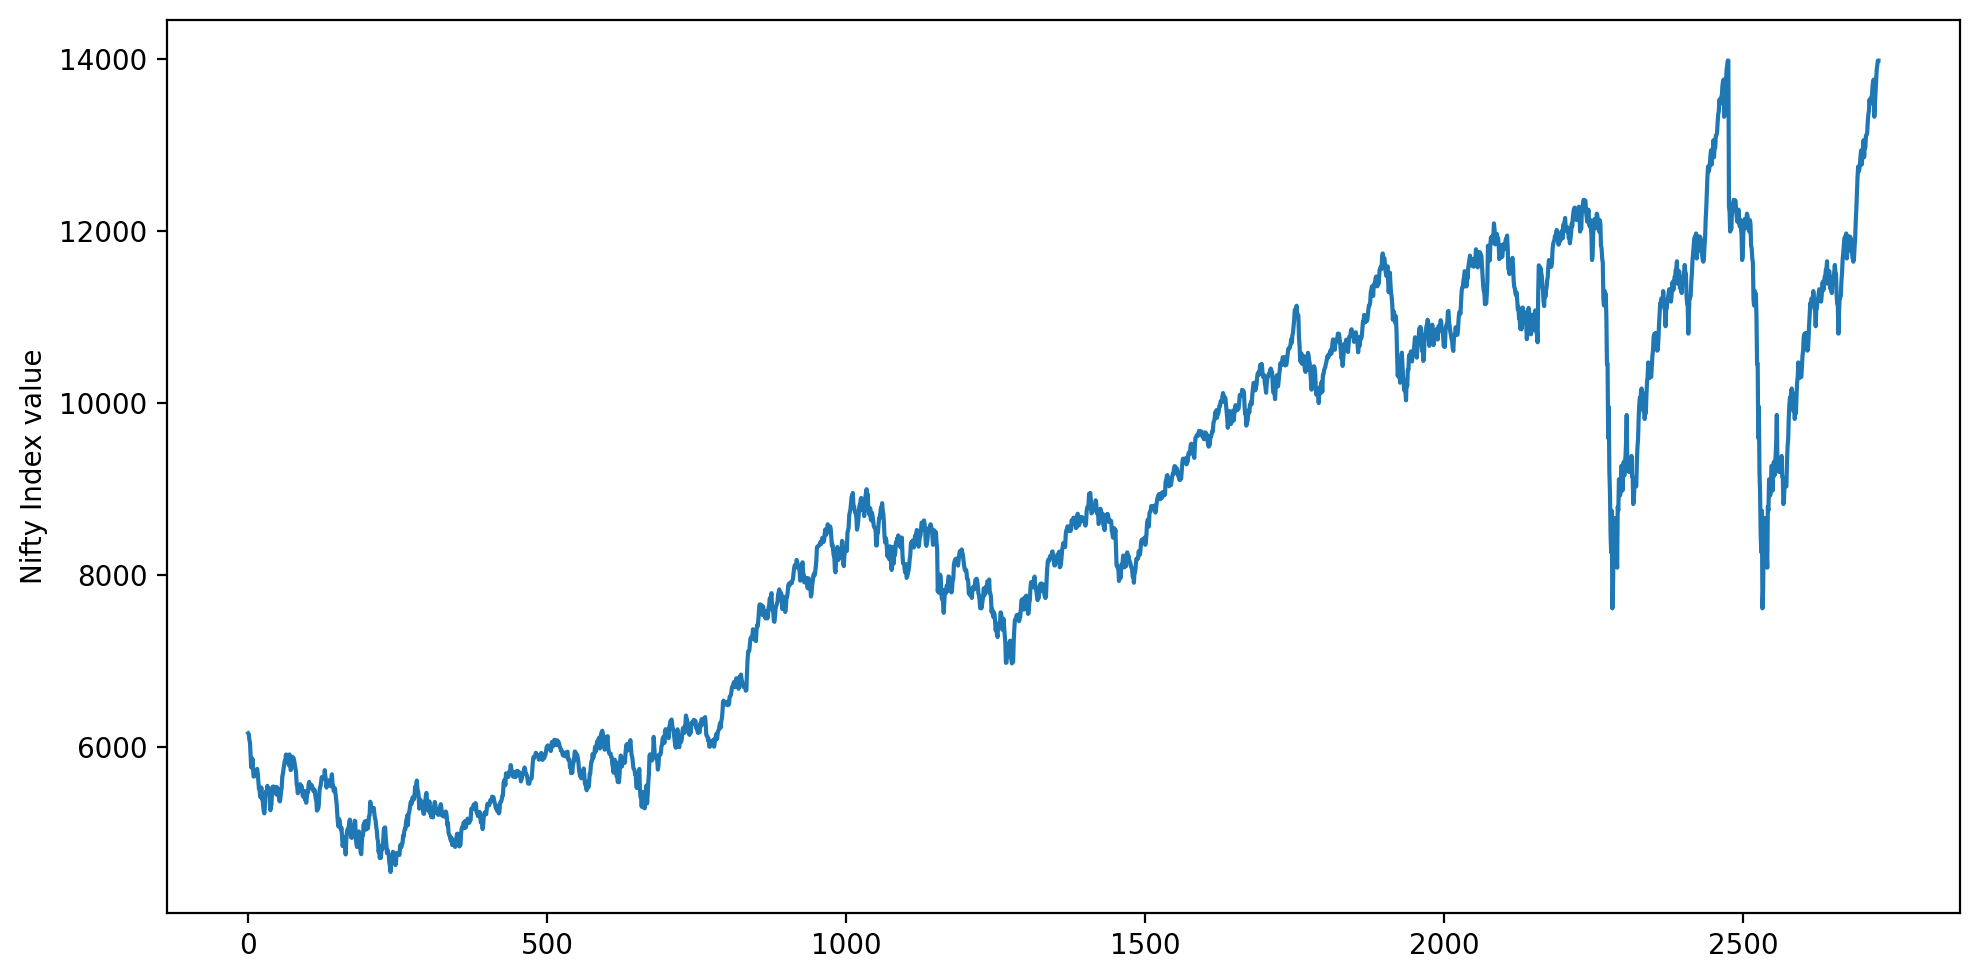

In [3]:
#plotting the trend line for past 10 years of Nifty Index
plt.figure(figsize = (10,5),dpi = 200)
LSTM_nifty50.plot.line()
plt.ylabel('Nifty Index value')
plt.tight_layout()

Using MinMax scaler for tranforming data

In [4]:
df2=LSTM_nifty50

#using SKLEARN tranforming our data by using min max scaler function
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1_new=scaler.fit_transform(np.array(df2).reshape(-1,1))

Creating training and testing data

In [5]:
#creating training and testing data by splitting in 80% and 20%

training_data,testing_data=df1_new[0:int(len(df1_new)*0.80),:],df1_new[int(len(df1_new)*0.80):len(df1_new),:1]

Creating dataset in the required form for LSTM

In [6]:

# converting the dataframe values into a matrix form of data
def dataset_new(dataset, time_step=1):
    Xinput = []
    Yinput = []
    range_len = len(dataset)-time_step
    for i in range(range_len):
        j = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        Xinput.append(j)
        Yinput.append(dataset[i + time_step, 0])
    return np.array(Xinput), np.array(Yinput) 

Splitting dataset in X and y format using dataset_new funciton

In [7]:
#assigning value for time step
time_step = 5

#splitting the dataset in X and y form by using dataset_new function

X_train, y_train = dataset_new(training_data, time_step)
X_test, ytest = dataset_new(testing_data, time_step)

Reshaping the data in required form for LSTM

In [8]:
xs1 = X_train.shape[0]
xs2 = X_train.shape[1]
xt1 = X_test.shape[0]
xt2 = X_test.shape[1]


#reshaping it into the format required by the LSTM model
X_train =X_train.reshape(xs1,xs2, 1)
X_test = X_test.reshape(xt1,xt2, 1)

Creating model

In [9]:
#using sequential model for our LSTM

model=Sequential()

#input layer
model.add(LSTM(80,return_sequences=True,input_shape=(5,1)))



#hidden layer 
model.add(LSTM(80))

#output layer
model.add(Dense(1))


#compling all layer and use MSE as loss function
model.compile(loss='mean_squared_error',optimizer='adam')

Using earlystopping

In [10]:
#defining early stopping 
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

Model summary

In [11]:
#printing summary of LSTM model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 80)             26240     
_________________________________________________________________
lstm_1 (LSTM)                (None, 80)                51520     
_________________________________________________________________
dense (Dense)                (None, 1)                 81        
Total params: 77,841
Trainable params: 77,841
Non-trainable params: 0
_________________________________________________________________


Fitting the LSTM model

In [12]:
#fitting the model by using early stopping in callbacks and using X_testing as validation set

model_fit=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
34/34 [==============================] - 2s 20ms/step - loss: 0.0330 - val_loss: 0.0049
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 2.6087e-04 - val_loss: 0.0014
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 2.2303e-04 - val_loss: 0.0014
Epoch 5/200
34/34 [==============================] - 0s 6ms/step - loss: 2.1379e-04 - val_loss: 0.0014
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 2.0821e-04 - val_loss: 0.0014
Epoch 7/200
34/34 [==============================] - 0s 5ms/step - loss: 2.0671e-04 - val_loss: 0.0013
Epoch 8/200
34/34 [==============================] - 0s 5ms/step - loss: 1.9914e-04 - val_loss: 0.0013
Epoch 9/200
34/34 [==============================] - 0s 5ms/step - loss: 1.9256e-04 - val_loss: 0.0013
Epoch 10/200
34/34 [==============================] - 0s 5ms/step - loss: 1.9022

34/34 [==============================] - 0s 6ms/step - loss: 1.5464e-04 - val_loss: 9.6608e-04
Epoch 80/200
34/34 [==============================] - 0s 6ms/step - loss: 1.5245e-04 - val_loss: 9.5705e-04
Epoch 81/200
34/34 [==============================] - 0s 5ms/step - loss: 1.6273e-04 - val_loss: 9.5024e-04
Epoch 82/200
34/34 [==============================] - 0s 5ms/step - loss: 1.5729e-04 - val_loss: 0.0011
Epoch 83/200
34/34 [==============================] - 0s 5ms/step - loss: 1.5750e-04 - val_loss: 9.4495e-04
Epoch 84/200
34/34 [==============================] - 0s 5ms/step - loss: 1.5180e-04 - val_loss: 9.2771e-04
Epoch 85/200
34/34 [==============================] - 0s 5ms/step - loss: 1.4673e-04 - val_loss: 9.3357e-04
Epoch 86/200
34/34 [==============================] - 0s 5ms/step - loss: 1.5094e-04 - val_loss: 0.0010
Epoch 87/200
34/34 [==============================] - 0s 6ms/step - loss: 1.5295e-04 - val_loss: 9.1128e-04
Epoch 88/200
34/34 [=============================

34/34 [==============================] - 0s 5ms/step - loss: 8.7079e-05 - val_loss: 4.5094e-04
Epoch 155/200
34/34 [==============================] - 0s 6ms/step - loss: 9.9729e-05 - val_loss: 4.5317e-04
Epoch 156/200
34/34 [==============================] - 0s 6ms/step - loss: 8.4707e-05 - val_loss: 4.4617e-04
Epoch 157/200
34/34 [==============================] - 0s 6ms/step - loss: 8.5367e-05 - val_loss: 4.4522e-04
Epoch 158/200
34/34 [==============================] - 0s 5ms/step - loss: 8.2837e-05 - val_loss: 6.2208e-04
Epoch 159/200
34/34 [==============================] - 0s 5ms/step - loss: 8.4059e-05 - val_loss: 4.4733e-04
Epoch 160/200
34/34 [==============================] - 0s 5ms/step - loss: 8.2858e-05 - val_loss: 4.4739e-04
Epoch 161/200
34/34 [==============================] - 0s 5ms/step - loss: 7.6782e-05 - val_loss: 4.4111e-04
Epoch 162/200
34/34 [==============================] - 0s 5ms/step - loss: 7.5009e-05 - val_loss: 4.9305e-04
Epoch 163/200
34/34 [============

Predicitng value by using Model


In [13]:
### Predicting training and testing dataset by model generated
training_predict=model.predict(X_train)
testing_predict=model.predict(X_test)

In [14]:
#defining function for returning predicted and actual value for any dataset fed to it
def predicting_value(filename):
    df5 = pd.read_csv(filename)
    df55 = df5['Close']
    df5_new=scaler.transform(np.array(df55).reshape(-1,1))
    
    testing_data=df5_new[0:len(df5_new),:1]
    
    time_step = 5
    X_test, ytest = dataset_new(testing_data, time_step)
    xt1 = X_test.shape[0]
    xt2 = X_test.shape[1]
    X_test = X_test.reshape(xt1,xt2, 1)
    tyu = model.predict(X_test)
    tyu_ = scaler.inverse_transform(tyu)
    tyu1 = tyu_.tolist()
    tyu2 = np.arange(len(tyu1))

    return df55[:-5],tyu1,tyu2

    

In [20]:
#filename for which we are going to test the model
filename = 'nifty50_test_2021.csv'

#asssigning new variables to predicting_value function 
df55y = predicting_value(filename)[0]
tyu1 = predicting_value(filename)[1]
tyu2 = predicting_value(filename)[2];


Plotting prediction vs actual for any file with 'filename'

In [21]:
#using interactive plot for plotting predicted value and actual value
import plotly.graph_objects as go

ii = []
for i in range(0,len(df55y)):
    tyunew = tyu1[i][0]
    i += 1
    ii.append(tyunew)

fig = go.Figure()

fig11=   go.Scatter(
        x=tyu2,
        y=ii,
        name = "prediction"
    )

fig22  =  go.Scatter(
        x=tyu2,
        y=df55y,
        name = "actual"
    )

data1 = [fig11,fig22]

#style layout 
layout1 = go.Layout(
    title="Nifty index Actual vs. Predicted",
    xaxis=dict(
        title="Days"
    ),
    yaxis=dict(
        title="Nifty index"
    ) ) 

fig = go.Figure(data=data1, layout=layout1)
fig.show()




Transforming data to actual value

In [17]:
#assigning new variables for reshaping
ys1 =y_train.shape[0]
yt1 = ytest.shape[0]
y_train=y_train.reshape(ys1,1)
y_test=ytest.reshape(yt1,1)

# Using scaler function, transforming the entrie data back to original form
train_pred=scaler.inverse_transform(training_predict)
test_pred=scaler.inverse_transform(testing_predict)
y_train_act=scaler.inverse_transform(y_train)
y_test_act=scaler.inverse_transform(y_test)

Generating Metrics

In [18]:
#importing the required LIBRARY for generating metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error


#defining function for Mean absolute precentage error
def MAPE(y_true,y_pred):
    mape=np.mean(np.abs(y_true-y_pred)/y_true)*100
    return mape


#calculating root mean squared error for train and test data
RMSE1 = (math.sqrt(mean_squared_error(y_train_act,train_pred)))
RMSE2 = (math.sqrt(mean_squared_error(y_test_act,test_pred)))

#calculating mean absolute error for train and test data
MAE1 = (mean_absolute_error(y_train_act,train_pred))
MAE2 = (mean_absolute_error(y_test_act,test_pred))

#calculating mean absolute precentage error for train and test data
MAPE1 = (MAPE(y_train_act,train_pred))
MAPE2 = (MAPE(y_test_act,test_pred))


# import module for tabulating above data
from tabulate import tabulate
  
# assign data
mydata = [["RMSE_training", RMSE1], ["RMSE_test", RMSE2],  ["MAE_train", MAE1],  ["MAE_test", MAE2], ["MAPE_train(%)", MAPE1], 
          ["MAPE_test(%)", MAPE2]]
  
# create header for values and metrics

head = ["Metric", "Value"]

# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))


+---------------+-----------+
| Metric        |     Value |
+===============+===========+
| RMSE_training | 100.636   |
+---------------+-----------+
| RMSE_test     | 224.414   |
+---------------+-----------+
| MAE_train     |  79.2699  |
+---------------+-----------+
| MAE_test      | 146.73    |
+---------------+-----------+
| MAPE_train(%) |   1.00797 |
+---------------+-----------+
| MAPE_test(%)  |   1.39317 |
+---------------+-----------+


Plotting Train loss and Test loss for epochs run

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig1  = go.Scatter(
        x=np.arange(len(model_fit.history['loss'])),
        y=(model_fit.history['loss']),
        name = "train_loss"
    )

fig2 =  go.Scatter(
        x=np.arange(len(model_fit.history['loss'])),
        y=(model_fit.history['val_loss']),
        name = "test_loss"
    )

data = [fig1,fig2]
#style layout 
layout = go.Layout(
    title="LOSS vs epoch",
    xaxis=dict(
        title="epoch"
    ),
    yaxis=dict(
        title="loss"
    ) ) 

fig = go.Figure(data=data, layout=layout)
fig.show()
